In [1]:
import collections
import pprint
import ijson
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from networkx.algorithms import bipartite
import difflib

In [13]:
# Load the documents into a documents list
documents = []

with open("sample_10.json", "rb") as j:
    for record in ijson.items(j, "item"):
        documents.append(record)

In [14]:
def extract_surname(name):
    split = name.split()
    if len(split) > 1:
        return ' '.join(split[1:])
    return name

In [28]:
# Exclude erroneous values
excluded = ["Minister",
            "dev",
            "Wo Ind",
            "px80",
            'TAC',
            'Bpa',
            'Minister III',
            'dd',
            'A',
            'Bovengrens',
            'AW',
            'KM',
            'M',
            'I',
           'Lening',
           'Rij',
           'IW',
           'Minister 15',
           'I',
           'W',
           'Fiscaliteit',
           'e',
           'n S',
           'R',
           't B',
           'JA21',
           'RaanfootnoteRef35',
           'cs2',
           'LEEUWARDEN',
           'RB',
           'ECNEO',
           'PPMWK',
           'VAN']

# Disable prettyprint automatic sorting
pprint.sorted = lambda x, key=None: x

doc_per = {}

# Add every sentence entry with ner label ORG (Organization) and PER (Person) to seperate lists
for doc in documents:
    per_list = []
    sentences = doc['sentences']
    for sent in sentences:
        sentence_entries = sent['ner_tags']['flair/ner-dutch-large']
        for entry in sentence_entries:
            if entry['ner_label'] == 'PER' and entry['text'] not in excluded:
                print(entry['text'])
                per_list.append(extract_surname(entry['text']))
    doc_per[doc['document_title']] = list(set(per_list))

Ernst Kuipers
GLBNSP
CJ Schouten
CJ Schouten
Boswijk
Bisschop
CJ Schouten
SAM
CJ Schouten
CJ Schouten
Age Kamerstuk
SAM
SAM
ThJAM de Bruijn
ThJAM de Bruijn
Tjeerd van der Meulen
Pijlman
CJ Schouten
AH
Schouten
RP Jansma
Van Raan
Teunissen
Hoekstra
Kent
FaberVan de Klashorst
Van Strien
Pijlman
Van Rooijen
Van Gurp
GL Van der Linden
Meijer
Prins
Vendrik
Van der Voort
Raven
De Boer
VesteringVan Raan
Vestering
Van Raan
LNV
Leon Adegeest
LP van der Linden
DE
VOOR
C van der WalZeggelink
VesteringVan Raan
Vestering
Van Raan
LNV
Leon Adegeest
Cathelijne Bouwkamp
Endenburg
de Slechtvalk
den
den
Anker Ziengs
Ouwehand en Schouw
Ouwehand
Schouw
Beckerman
Van Campen
Tjeerd de Groot
Tjeerd de Groot
Van Campen
Van Campen
Tjeerd de Groot
Tjeerd de Groot
Bisschop
Van der Plas
Tjeerd de Groot
Tjeerd de Groot
Motie Van Campen
Van Campen
Tjeerd De Groot
Tjeerd de Groot
Boswijk
Smeulders
Beckerman
Van Campen
CJ Schouten


In [29]:
print(doc_per)

{'Contaminatie in het vlees van ‘grote grazers’ in uiterwaarden': ['Kuipers'], 'Landbouw- en Visserijraad': ['Kamerstuk', 'SAM', 'GLBNSP', 'Boswijk', 'Schouten', 'de Bruijn', 'Bisschop'], '2022-10-12 Motie GL - Bestemmingsplan Snippergroen 2022 AANGENOMEN': ['van der Meulen'], 'Brief van de minister van LNV over de stand van zaken van het Omschakelprogramma': ['Pijlman', 'AH', 'Schouten'], "Reactie op het speciaal verslag 'EU-financiering voor biodiversiteit en klimaatverandering in de bossen in de EU, maar beperkte resultaten' van ERK": ['Schouten', 'Jansma'], 'Antwoord op vragen van de leden Van Raan en Teunissen over “de door Nederland uitgesproken steun aan diepzeemijnbouw”': ['Teunissen', 'Kent', 'Raan', 'Hoekstra'], 'Verslag van een schriftelijk overleg met de minister voor N&S over voortgang stikstofproblematiek': ['Adegeest', 'Raven', 'Raan', 'Vendrik', 'VOOR', 'Vestering', 'de Klashorst', 'der Voort', 'LNV', 'Strien', 'van der WalZeggelink', 'Pijlman', 'Boer', 'Gurp', 'Van der

In [30]:
doc_list = list(doc_per.keys())
doc_list

['Contaminatie in het vlees van ‘grote grazers’ in uiterwaarden',
 'Landbouw- en Visserijraad',
 '2022-10-12 Motie GL - Bestemmingsplan Snippergroen 2022 AANGENOMEN',
 'Brief van de minister van LNV over de stand van zaken van het Omschakelprogramma',
 "Reactie op het speciaal verslag 'EU-financiering voor biodiversiteit en klimaatverandering in de bossen in de EU, maar beperkte resultaten' van ERK",
 'Antwoord op vragen van de leden Van Raan en Teunissen over “de door Nederland uitgesproken steun aan diepzeemijnbouw”',
 'Verslag van een schriftelijk overleg met de minister voor N&S over voortgang stikstofproblematiek',
 'Bijlage 1 - Visie Dierenwelzijn 2021-2030',
 'Wijziging van de Wet gewasbeschermingsmiddelen en biociden (grondslag voor maatregelen inzake het (particulier) gebruik van gewasbeschermingsmiddelen',
 'Voorbereiding van het GLB-NSP commissiedebat op 8 december, inclusief concept NSP & S-MER']

In [31]:
actor_list = set(list([actor for actor_list in list(doc_per.values()) for actor in actor_list]))
actor_list

{'AH',
 'Adegeest',
 'Beckerman',
 'Bisschop',
 'Boer',
 'Boswijk',
 'Bouwkamp',
 'Campen',
 'DE',
 'De Groot',
 'Endenburg',
 'GLBNSP',
 'Gurp',
 'Hoekstra',
 'Jansma',
 'Kamerstuk',
 'Kent',
 'Kuipers',
 'LNV',
 'Meijer',
 'Ouwehand',
 'Pijlman',
 'Prins',
 'Raan',
 'Raven',
 'Rooijen',
 'SAM',
 'Schouten',
 'Schouw',
 'Slechtvalk',
 'Smeulders',
 'Strien',
 'Teunissen',
 'VOOR',
 'Van Campen',
 'Van der Linden',
 'Vendrik',
 'Vestering',
 'Ziengs',
 'de Bruijn',
 'de Groot',
 'de Klashorst',
 'den',
 'der Plas',
 'der Voort',
 'en Schouw',
 'van der Linden',
 'van der Meulen',
 'van der WalZeggelink'}

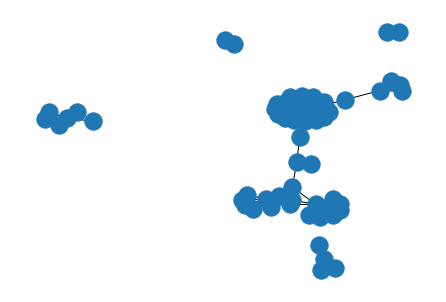

In [32]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(doc_list, bipartite=0)
B.add_nodes_from(actor_list, bipartite=1)

# (1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")
test = [[(doc, per_list) for per_list in doc_per[doc]] for doc in doc_list]
flattened = [item for sublist in test for item in sublist]
B.add_edges_from(flattened)
nx.bipartite.maximum_matching(B, top_nodes=doc_list)
nx.draw(B, font_weight='bold')

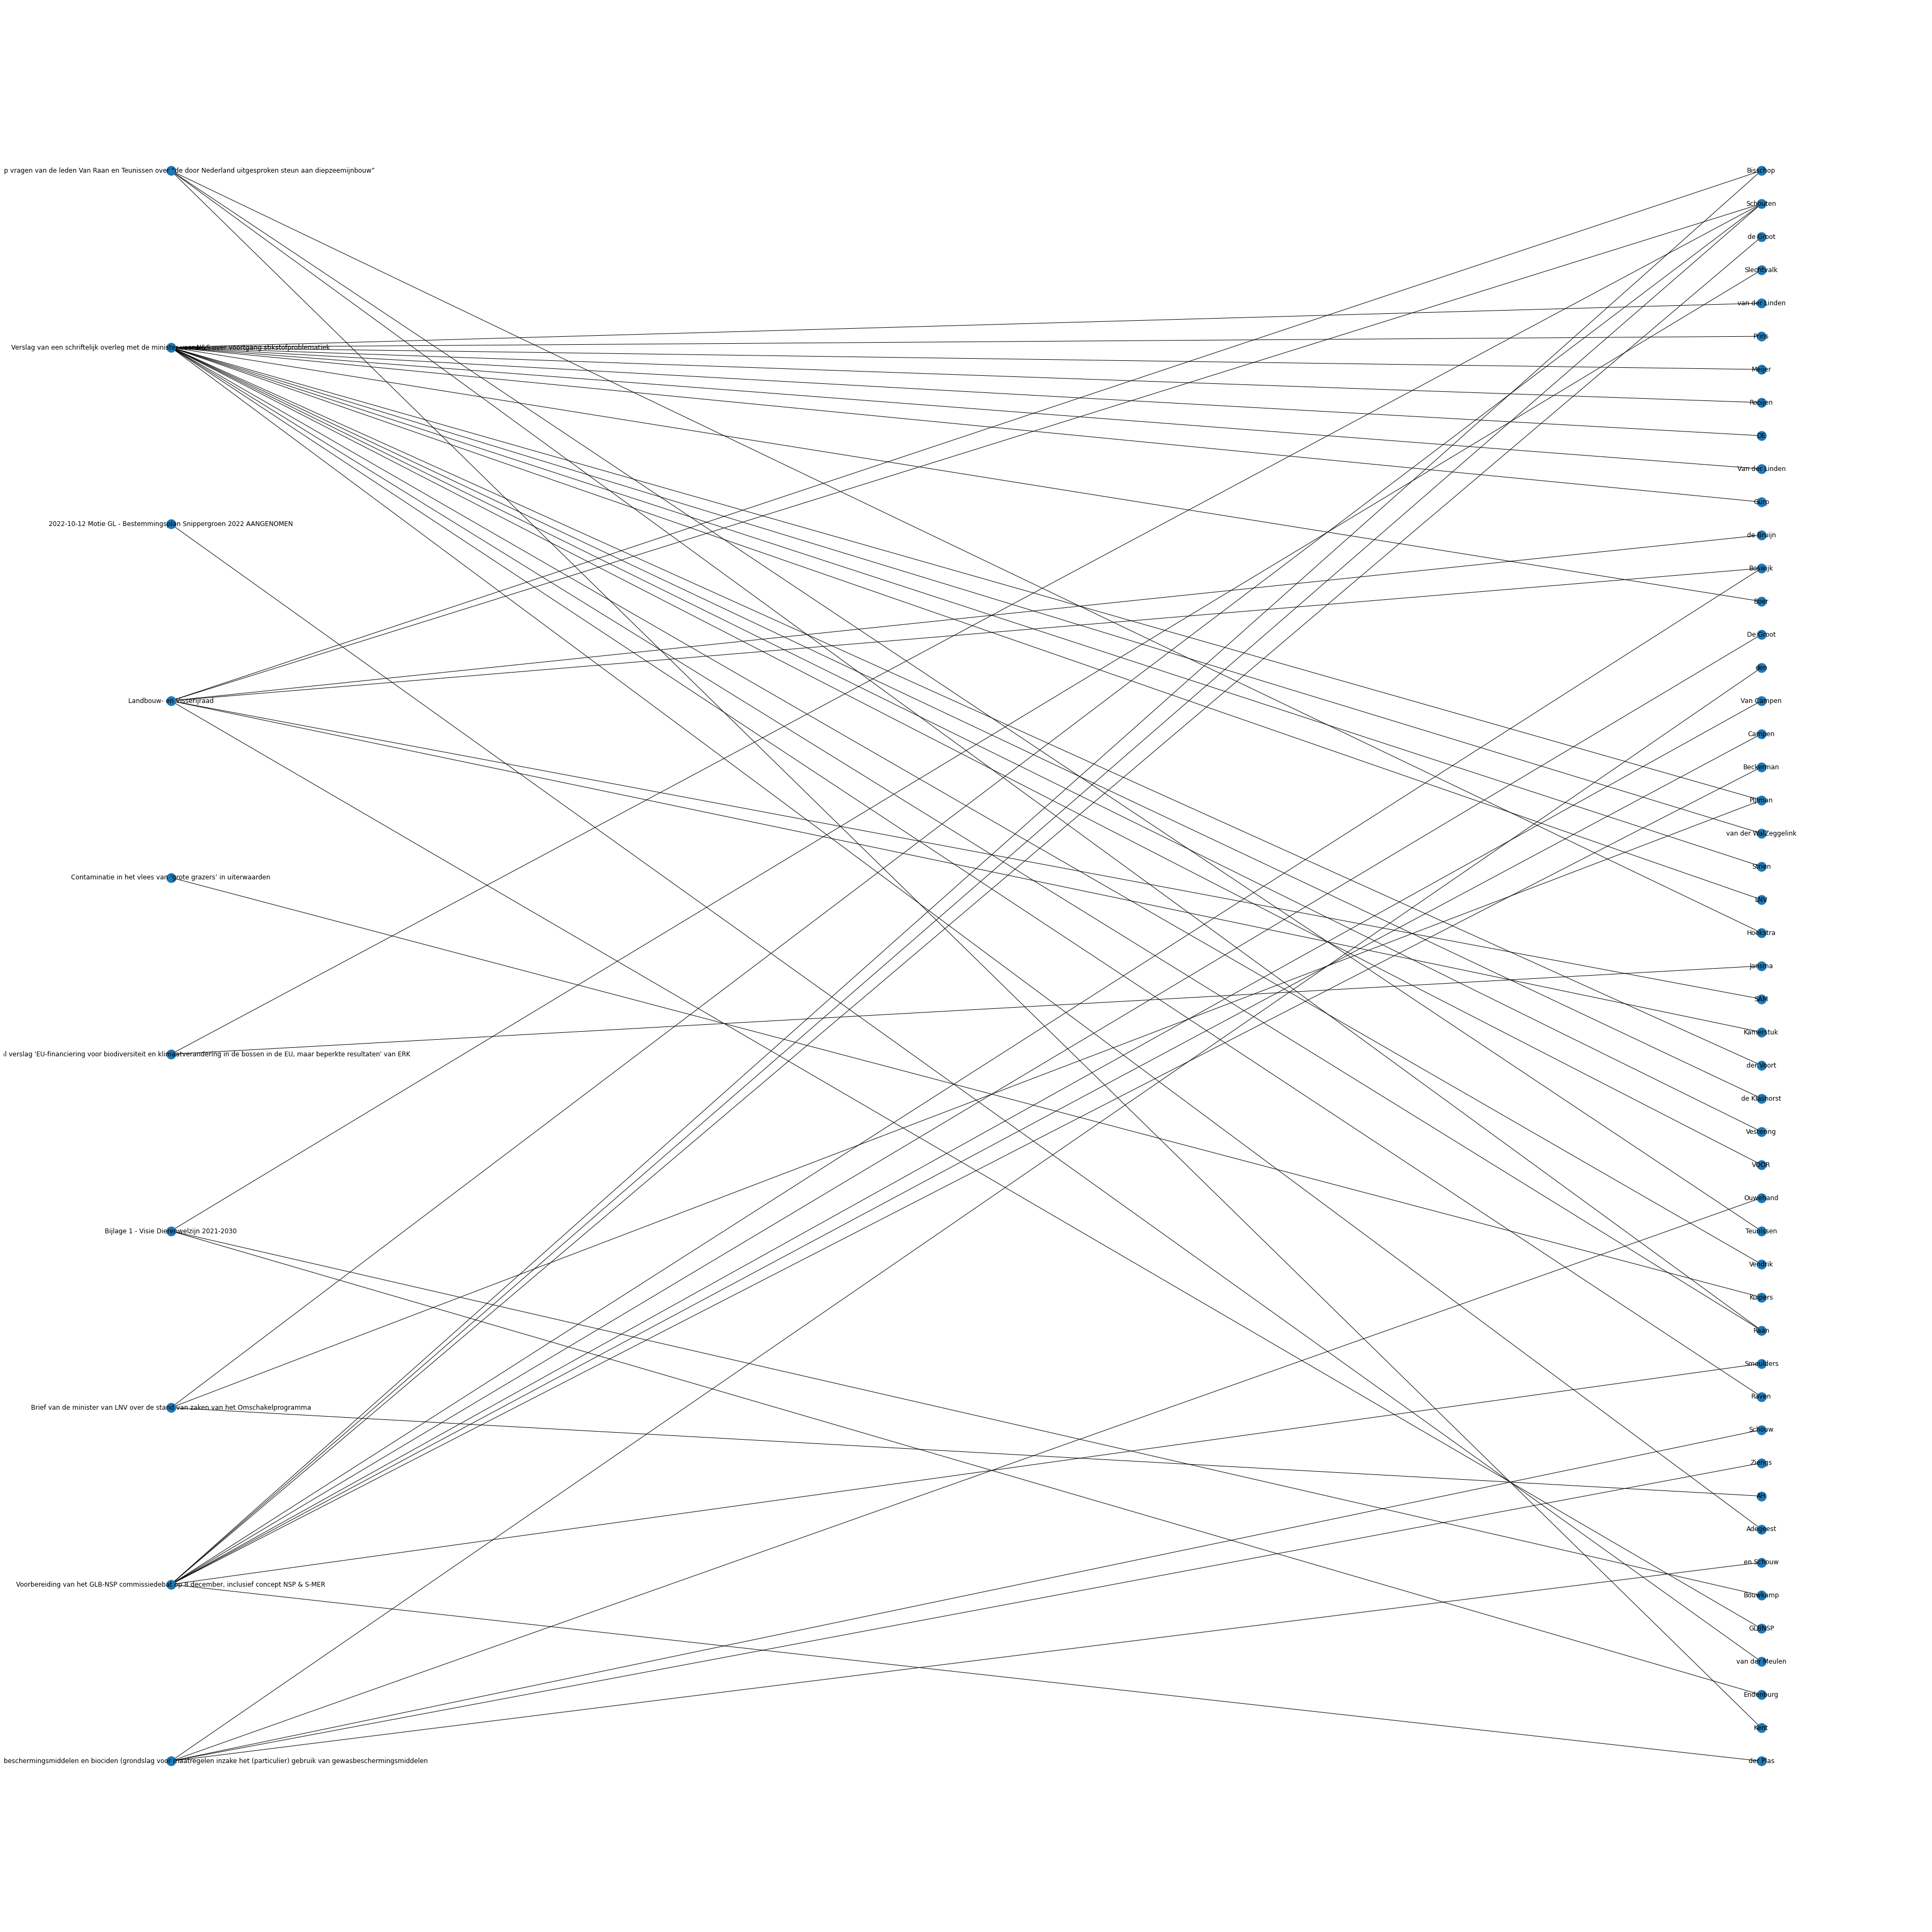

In [33]:
plt.figure(figsize=(50,50))
nx.draw(B, pos=nx.bipartite_layout(B, doc_list, align='vertical'),with_labels=True)
plt.show()